In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [53]:
#df = pd.read_csv("../dataset/customer_supermarket_no_inconsistency.csv", parse_dates=["BasketDate"], index_col=0, decimal=",")
df = pd.read_csv("../dataset/customer_supermarket_no_inconsistency.csv", sep="\t", index_col=0, parse_dates=["BasketDate"], decimal=",")
print(len(df))
df = df[df['Outlier'] == False]
print(len(df))
df.Sale = df.Sale.astype(float)
print(df.info())

387881
387641
<class 'pandas.core.frame.DataFrame'>
Int64Index: 387641 entries, 0 to 387880
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         387641 non-null  int64         
 1   BasketDate       387641 non-null  datetime64[ns]
 2   ProdID           387641 non-null  object        
 3   Qta              387641 non-null  int64         
 4   Sale             387641 non-null  float64       
 5   CustomerID       387641 non-null  int64         
 6   CustomerCountry  387641 non-null  object        
 7   ProdDescr        387641 non-null  object        
 8   Outlier          387641 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.0+ MB
None


In [54]:
ind = pd.read_csv("../dataset/indicators.csv", index_col=0)
ind.CustomerID = ind.CustomerID.astype(int)
print(ind.head())
print(ind.info())

   CustomerID       Entropy  imax   iu     i
0       12347 -14642.853340   319  103  2458
1       12348 -15464.124169  1254   22  2341
2       12349  -4060.803486   630   72   630
3       12350  -1040.791135   197   17   197
4       12352  -2359.276847    98   58   533
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4326 entries, 0 to 4325
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4326 non-null   int64  
 1   Entropy     4326 non-null   float64
 2   imax        4326 non-null   int64  
 3   iu          4326 non-null   int64  
 4   i           4326 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 202.8 KB
None


In [55]:
customers = df.groupby(["CustomerID"]).agg({
    'CustomerCountry':'min',
    "Sale":sum})
customers.head()

,CustomerCountry,Sale
CustomerID,,
12347,Iceland,481.21
12348,Finland,178.71
12349,Italy,305.10
12350,Norway,65.30
12352,Norway,513.81


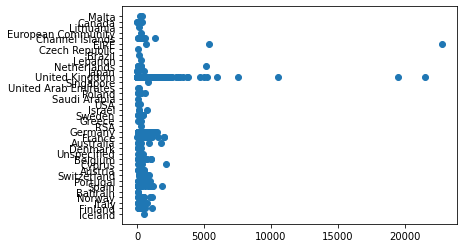

In [56]:
plt.scatter(customers.Sale, customers.CustomerCountry)

Joining total sales with indicators dataframe on customer id

In [57]:
ind = ind.join(customers, on="CustomerID")

ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4326 entries, 0 to 4325
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4326 non-null   int64  
 1   Entropy          4326 non-null   float64
 2   imax             4326 non-null   int64  
 3   iu               4326 non-null   int64  
 4   i                4326 non-null   int64  
 5   CustomerCountry  4326 non-null   object 
 6   Sale             4326 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 270.4+ KB


In [58]:
# dropping customer country String column
ind_no_cust = ind.drop("CustomerCountry", axis=1)

In [59]:
ind_no_cust.describe()

,CustomerID,Entropy,imax,iu,i,Sale
count,4326.000000,4.326000e+03,4326.000000,4326.000000,4326.000000,4326.000000
mean,15299.179843,-6.861227e+03,233.129912,61.656727,1102.464632,266.370153
std,1721.201669,3.547493e+04,314.871005,85.417337,4485.883077,701.069339
min,12347.000000,-1.622773e+06,1.000000,1.000000,1.000000,0.170000
25%,13813.250000,-5.441834e+03,82.000000,16.000000,159.000000,51.597500
50%,15298.500000,-1.963720e+03,154.000000,35.500000,375.000000,125.000000
75%,16778.750000,-7.576294e+02,278.000000,78.000000,969.250000,284.742500
max,18287.000000,0.000000e+00,7824.000000,1786.000000,188323.000000,22776.010000


#### We drop the entropy since it causes problem in our graphs for now

In [60]:
ind_no_ent = ind_no_cust.drop("Entropy", axis=1)

### Scaling values in order to avoid bias by using a standard scaler

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [62]:
scaler = MinMaxScaler()
# we could also try with the standard scaler
scaler.fit(ind_no_ent.values)

MinMaxScaler()

In [63]:
ind_no_ent.head().values

array([[12347.  ,   319.  ,   103.  ,  2458.  ,   481.21],
       [12348.  ,  1254.  ,    22.  ,  2341.  ,   178.71],
       [12349.  ,   630.  ,    72.  ,   630.  ,   305.1 ],
       [12350.  ,   197.  ,    17.  ,   197.  ,    65.3 ],
       [12352.  ,    98.  ,    58.  ,   533.  ,   513.81]])

In [64]:
scaler.transform(ind_no_ent.head().values)

array([[0.        , 0.04064937, 0.05714286, 0.0130468 , 0.02112063],
       [0.00016835, 0.16016873, 0.01176471, 0.01242553, 0.00783901],
       [0.0003367 , 0.08040394, 0.03977591, 0.00334002, 0.01338831],
       [0.00050505, 0.02505433, 0.00896359, 0.00104077, 0.00285961],
       [0.00084175, 0.01239934, 0.03193277, 0.00282495, 0.02255197]])

In [65]:
X = scaler.fit_transform(ind_no_ent.values)

## K-Means

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [67]:
kmeans = KMeans(n_clusters=6, n_init=10, max_iter=150)
kmeans.fit(X)

KMeans(max_iter=150, n_clusters=6)

In [68]:
kmeans.labels_

array([5, 5, 5, ..., 2, 2, 2], dtype=int32)

size of each cluster

In [69]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([869,   9, 830, 851, 876, 891]))

In [70]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 869, 1: 9, 2: 830, 3: 851, 4: 876, 5: 891}

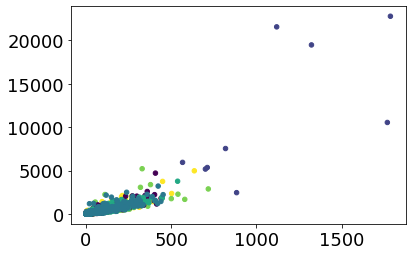

In [71]:
plt.scatter(ind_no_ent['iu'], ind_no_ent['Sale'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

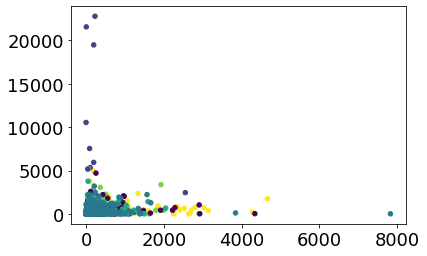

In [72]:
plt.scatter(ind_no_ent['imax'], ind_no_ent['Sale'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

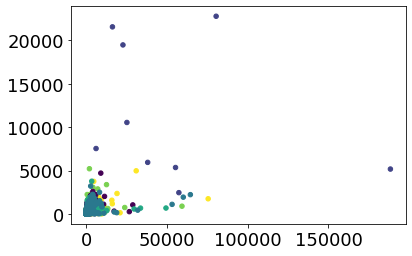

In [73]:
plt.scatter(ind_no_ent['i'], ind_no_ent['Sale'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

In [74]:
"""plt.scatter(ind['iu'], ind['Entropy'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()"""

"plt.scatter(ind['iu'], ind['Entropy'], \n            c=kmeans.labels_, s=20)\nplt.tick_params(labelsize=18)\nplt.show()"

In [75]:
"""plt.scatter(ind['Sale'], ind['Entropy'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()"""

"plt.scatter(ind['Sale'], ind['Entropy'], \n            c=kmeans.labels_, s=20)\nplt.tick_params(labelsize=18)\nplt.show()"

In [76]:
kmeans.cluster_centers_

array([[0.50847085, 0.02992299, 0.031703  , 0.00450351, 0.01016325],
       [0.40198279, 0.04864573, 0.60192966, 0.28934308, 0.49165139],
       [0.90337716, 0.02638272, 0.03267546, 0.00567094, 0.01034506],
       [0.70660095, 0.02638937, 0.03320433, 0.00483808, 0.01041536],
       [0.30538529, 0.02786844, 0.034082  , 0.00494062, 0.01106379],
       [0.09821371, 0.03720905, 0.03232009, 0.00632149, 0.0114031 ]])

### Cluster Centers visualization

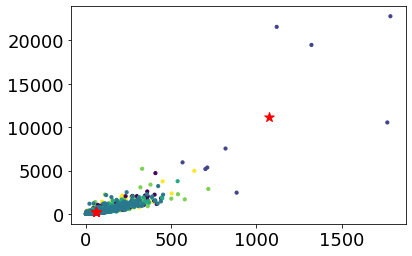

[  57.58986175 1075.44444444   59.32569361   60.26972909   61.83636364
   58.69135802] 
 [  231.64647581 11197.94333333   235.78741858   237.38857597
   252.15720568   259.88511897]


In [77]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(ind_no_ent['iu'], ind_no_ent['Sale'], c=kmeans.labels_, 
            s=10)
plt.scatter(centers[:, 2], centers[:, 4], s=100, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

print(centers[:, 2], "\n", centers[:, 4])

### Cluster Centers as parallel coordinates

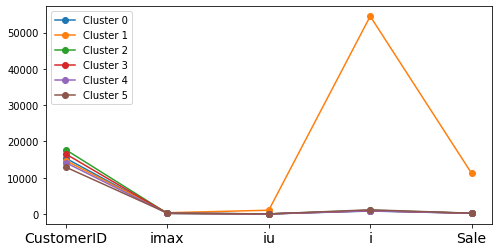

In [78]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(ind_no_ent.columns)), ind_no_ent.columns, fontsize=14)
plt.legend(fontsize=10)
plt.show()

### Centroids radar chart

<ipython-input-79-f01a45e21066>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(polar=True)


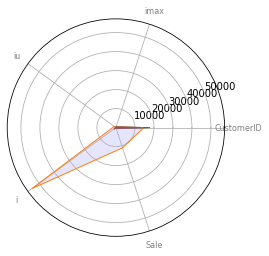

In [79]:
from math import pi
 
# number of variable
N = len(ind_no_ent.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], ind_no_ent.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)


### SSE and Clustering Validation

In [80]:
from sklearn import metrics
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(X, kmeans.labels_))

SSE 32.40760526515185
Silhouette 0.449362983916967
Separation 0.7196587544955665


In [81]:
ind

,CustomerID,Entropy,imax,iu,i,CustomerCountry,Sale
0,12347,-14642.853340,319,103,2458,Iceland,481.21
1,12348,-15464.124169,1254,22,2341,Finland,178.71
2,12349,-4060.803486,630,72,630,Italy,305.10
3,12350,-1040.791135,197,17,197,Norway,65.30
4,12352,-2359.276847,98,58,533,Norway,513.81
...,...,...,...,...,...,...,...
4321,18280,-171.299812,45,10,45,United Kingdom,47.65
4322,18281,-215.405139,54,7,54,United Kingdom,39.36
4323,18282,-417.113335,75,12,103,United Kingdom,62.39
4324,18283,-6354.286026,61,263,1357,United Kingdom,1174.33


In [82]:
sale_xt_pct = pd.crosstab(kmeans.labels_,ind['Sale'])
ccountry_xt_pct = pd.crosstab(kmeans.labels_,ind['CustomerCountry'])
iu_xt_pct = pd.crosstab(kmeans.labels_,ind["iu"])

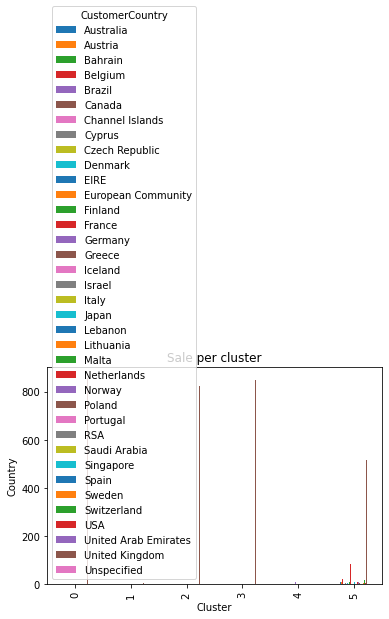

In [83]:
ccountry_xt_pct.plot(kind='bar', stacked=False, 
                   title='Sale per cluster')
plt.xlabel('Cluster')
plt.ylabel('Country')
plt.show()

# no, così non funziona, dobbiamo trovare degli indicatori categorici 
# (tipo calcolarci noi se un cliente è highly spending eccetera)

In [84]:
"""sale_xt_pct.plot(kind='bar', stacked=False, 
                   title='Sale per cluster')
plt.xlabel('Cluster')
plt.ylabel('Sale')
plt.show()"""

"sale_xt_pct.plot(kind='bar', stacked=False, \n                   title='Sale per cluster')\nplt.xlabel('Cluster')\nplt.ylabel('Sale')\nplt.show()"

Computing the best K

In [85]:
sse_list = list()
max_k = 40
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

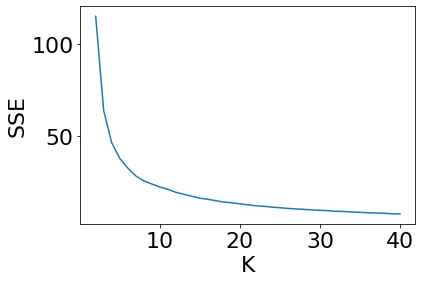

In [86]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Best K seems to be 5 or 6

In [87]:
#Similarity between assignments
i = ind.i
metrics.adjusted_rand_score(i, kmeans.labels_)

0.0004926649452965119

## DBSCAN

In [88]:
from sklearn.cluster import DBSCAN

In [89]:
dbscan = DBSCAN(eps=0.07, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.07, min_samples=3)

In [90]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3]), array([  45, 4267,    6,    5,    3]))

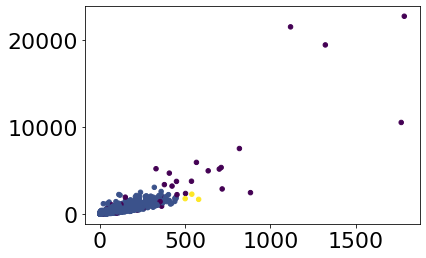

In [92]:
plt.scatter(ind_no_ent['iu'], ind_no_ent['Sale'], 
            c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [93]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.09525916419246494


Best eps with knee method

In [94]:
from scipy.spatial.distance import pdist, squareform

In [95]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[0.12853354 0.04512383 0.05515716 ... 0.14901004 0.05955292 0.13508737]

[[0.         0.12853354 0.04512383 ... 1.00119107 1.0043586  1.00068439]
 [0.12853354 0.         0.0852081  ... 1.01039242 1.02065672 1.00484192]
 [0.04512383 0.0852081  0.         ... 1.00196252 1.00806355 0.99990627]
 ...
 [1.00119107 1.01039242 1.00196252 ... 0.         0.14901004 0.05955292]
 [1.0043586  1.02065672 1.00806355 ... 0.14901004 0.         0.13508737]
 [1.00068439 1.00484192 0.99990627 ... 0.05955292 0.13508737 0.        ]]


In [96]:
k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

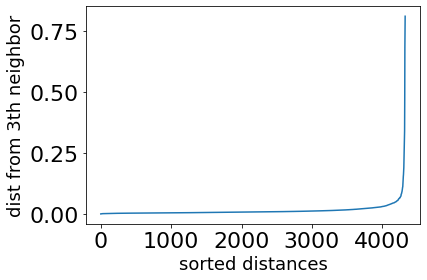

In [97]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Hierarchical clustering

In [98]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

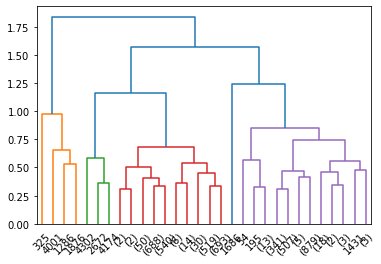

In [99]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

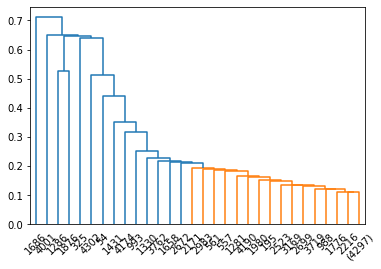

In [100]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

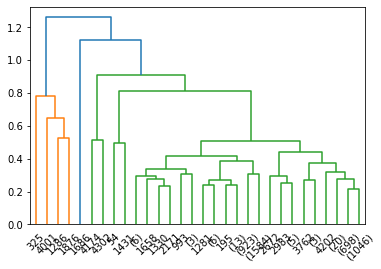

In [101]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=1, truncate_mode='lastp')